<a href="https://colab.research.google.com/github/AmitS1009/ML_Projects/blob/main/Pro_2_DominantColor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
img = cv2.imread('/grp.jpeg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img.shape)

(1854, 1600, 3)


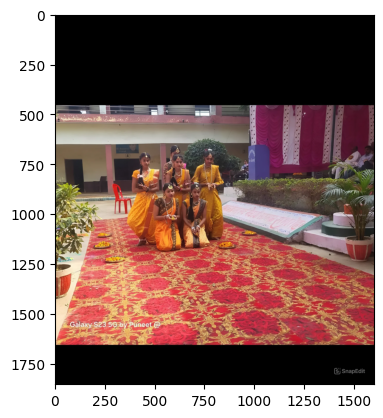

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
X = img.reshape(-1, 3)
print(X.shape)

(2966400, 3)


In [ ]:
k = 4
model = KMeans(n_clusters=k)
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [ ]:
centroids = model.cluster_centers_

In [ ]:
print(centroids)

[[211.05213309 178.79721751 153.40921036]
 [  1.22689685   0.92495617   0.89386565]
 [ 88.7605067   58.52147266  58.10858741]
 [182.10939759  89.85372027  76.49970286]]


In [ ]:
colors = np.array(centroids, dtype = 'uint8')

In [ ]:
print(colors)

[[211 178 153]
 [  1   0   0]
 [ 88  58  58]
 [182  89  76]]


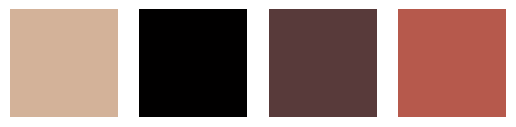

In [ ]:
#color patch

i = 1
for color in colors:
    plt.subplot(1, k, i)    # Create subplots with 1 row and k columns
    plt.axis('off')         # Turn off the axis
    i += 1                  # Increment subplot index
    mat = np.zeros((100, 100, 3), dtype='uint8')  # Create 100x100 matrix with 3 channels (RGB)
    mat[:, :, :] = color    # Fill the matrix with the current color

    plt.imshow(mat)         # Display the matrix as a color patch

plt.show()

In [ ]:
#  Basic segmentation based upon similar color regions
# segmentation partitions an image into regions
# having similar visual appearance corresponding to parts of objects

print(colors)

[[211 178 153]
 [  1   0   0]
 [ 88  58  58]
 [182  89  76]]


In [ ]:
np.unique(model.labels_)

array([0, 1, 2, 3], dtype=int32)

In [ ]:
model.labels_.shape

(2966400,)

In [ ]:
newImg = np.zeros(X.shape, dtype = 'uint8')
print(newImg.shape)

(2966400, 3)


In [ ]:
for i in range(newImg.shape[0]):
  newImg[i] = colors[model.labels_[i]]

In [ ]:
newImg = newImg.reshape(img.shape)

In [ ]:
print(newImg.shape)

(1854, 1600, 3)


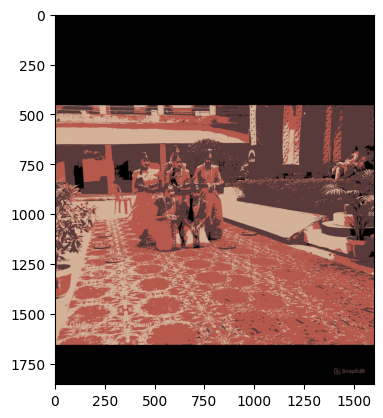

In [ ]:
plt.imshow(newImg)